In [5]:
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt

def time_series_monthly(data):
    
    months = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]

    nrows = 6  
    ncols = 2  

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
    fig.suptitle('Sea Surface Temperature 2022')

    for i, ds in enumerate(data):
        filtered = ds.where(
    (ds['sea_surface_temp_qc_1_agg'] == 1) &
    (ds['sea_surface_temp_qc_1_gap'] == 1) &
    (ds['sea_surface_temp_qc_1_syn'] == 1) &
    (ds['sea_surface_temp_qc_1_loc'] == 1) &
    (ds['sea_surface_temp_qc_1_rng'] == 1) &
    (ds['sea_surface_temp_qc_1_clm'] == 1) &
    (ds['sea_surface_temp_qc_1_spk'] == 2) &
    (ds['sea_surface_temp_qc_1_rtc'] == 2) &
    (ds['sea_surface_temp_qc_1_flt'] == 2),
    drop=True
)
        filtered['time'] = filtered.indexes['time'].to_datetimeindex()

        row, col = i // ncols, i % ncols  
        axes = ax[row, col]

        axes.plot(filtered.indexes["time"], filtered['sea_surface_temperature_1'])
        axes.set_title(f'Sea Surface Temperature {months[i]} 2022')
        if row == nrows - 1:
            axes.set_xlabel("Days")
        if col == 0:
            axes.set_ylabel("Celsius")
        axes.tick_params(axis='x', rotation=45)
        axes.set_ylim(10, 35)
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.3,
                        hspace=0.5)
    fig.set_figheight(16)
    fig.set_figwidth(16)
    plt.tight_layout()
    plt.show()


C:\Users\sripr\AppData\Local\Temp\ipykernel_21948\2845930968.py:28: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  filtered['time'] = filtered.indexes['time'].to_datetimeindex()
C:\Users\sripr\AppData\Local\Temp\ipykernel_21948\2845930968.py:28: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  filtered['time'] = filtered.indexes['time'].to_datetimeindex()
C:\Users\sripr\AppData\Local\Temp\ipykernel_21948\2845930968.py:28: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the sta

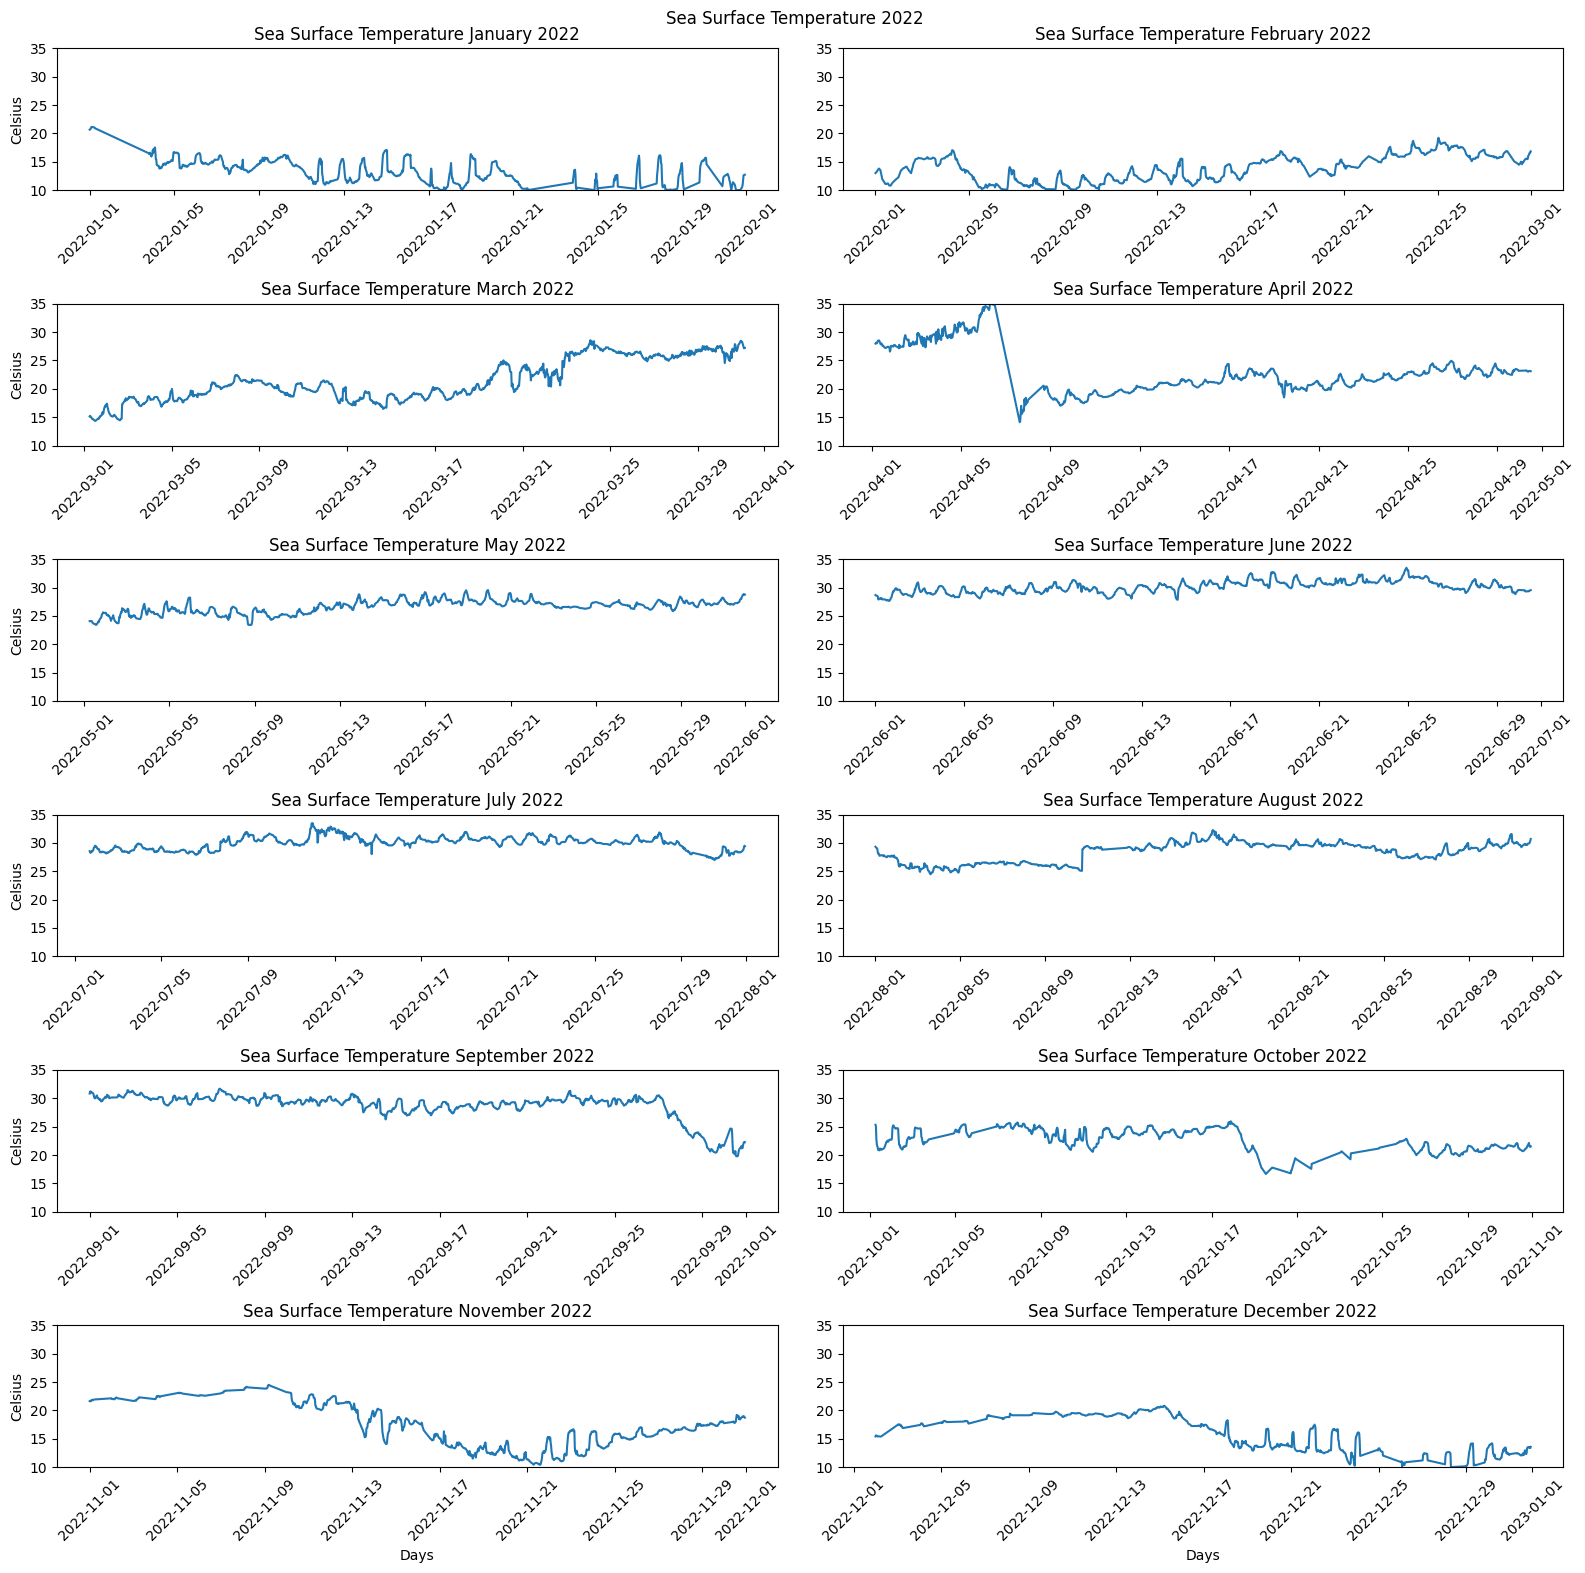

In [3]:
ds1= xr.open_dataset("C:\\Users\\sripr\\Downloads\\gcoos_ioos-station-DISL-DISL_2022_01.nc")
ds2= xr.open_dataset("C:\\Users\\sripr\\Downloads\\gcoos_ioos-station-DISL-DISL_2022_02.nc")
ds3= xr.open_dataset("C:\\Users\\sripr\\Downloads\\gcoos_ioos-station-DISL-DISL_2022_03.nc")
ds4= xr.open_dataset("C:\\Users\\sripr\\Downloads\\gcoos_ioos-station-DISL-DISL_2022_04.nc")
ds5= xr.open_dataset("C:\\Users\\sripr\\Downloads\\gcoos_ioos-station-DISL-DISL_2022_05.nc")
ds6= xr.open_dataset("C:\\Users\\sripr\\Downloads\\gcoos_ioos-station-DISL-DISL_2022_06.nc")
ds7= xr.open_dataset("C:\\Users\\sripr\\Downloads\\gcoos_ioos-station-DISL-DISL_2022_07.nc")
ds8= xr.open_dataset("C:\\Users\\sripr\\Downloads\\gcoos_ioos-station-DISL-DISL_2022_08.nc")
ds9= xr.open_dataset("C:\\Users\\sripr\\Downloads\\gcoos_ioos-station-DISL-DISL_2022_09.nc")
ds10= xr.open_dataset("C:\\Users\\sripr\\Downloads\\gcoos_ioos-station-DISL-DISL_2022_10.nc")
ds11= xr.open_dataset("C:\\Users\\sripr\\Downloads\\gcoos_ioos-station-DISL-DISL_2022_11.nc")
ds12= xr.open_dataset("C:\\Users\\sripr\\Downloads\\gcoos_ioos-station-DISL-DISL_2022_12.nc")

data = [ds1, ds2, ds3, ds4, ds5, ds6, ds7, ds8, ds9, ds10, ds11, ds12]

time_series_monthly(data)

C:\Users\sripr\AppData\Local\Temp\ipykernel_21948\2606685787.py:20: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  year_data['time'] = year_data.indexes['time'].to_datetimeindex()


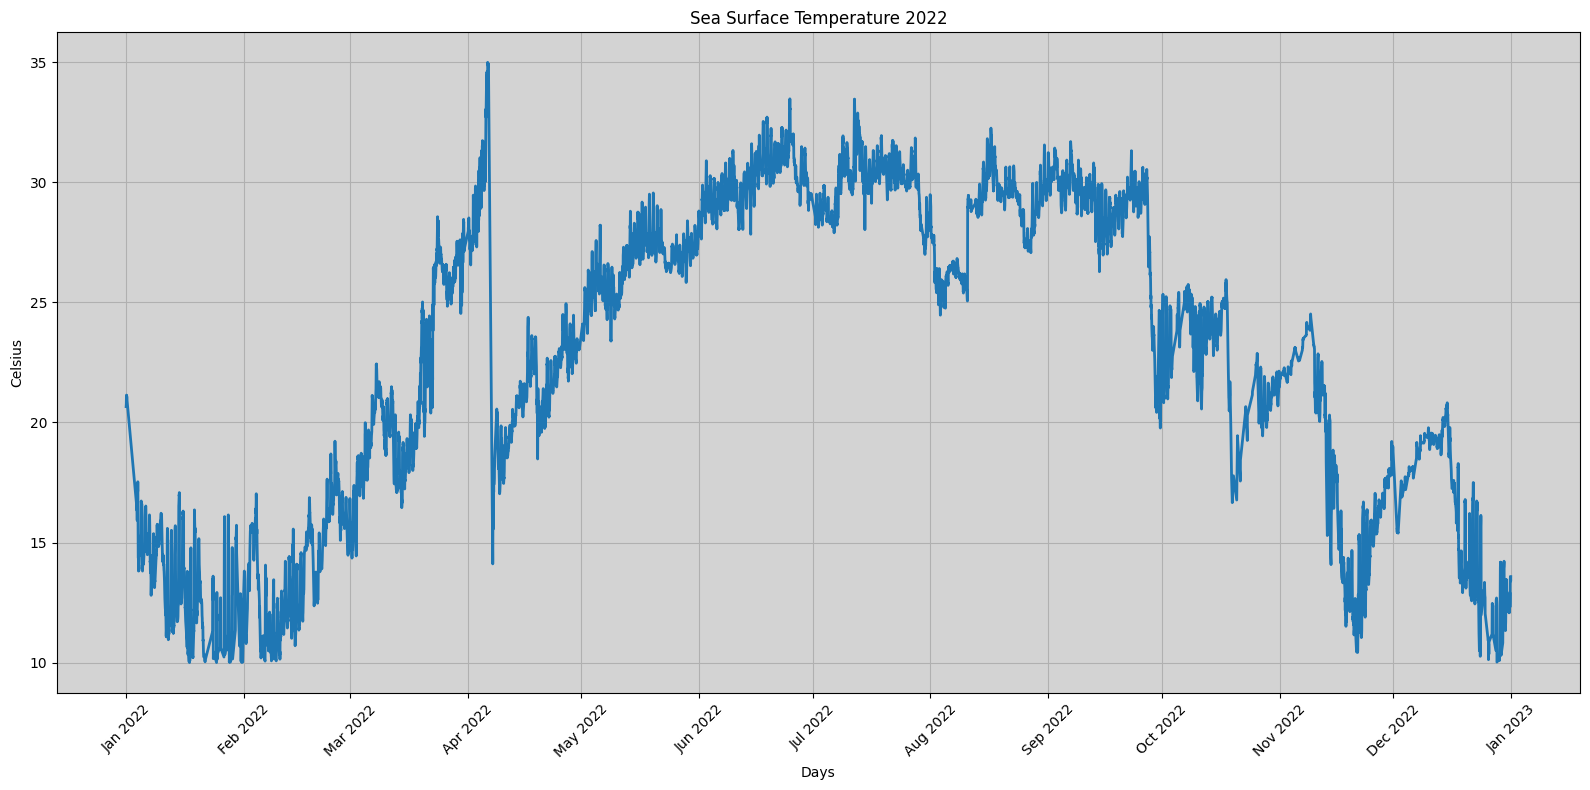

In [18]:
from matplotlib.dates import MonthLocator, DateFormatter
def time_series_year(data):
    
        
    year_data = xr.concat(data, dim='time')
    
    
    year_data = year_data.where(
    (year_data['sea_surface_temp_qc_1_agg'] == 1) &
    (year_data['sea_surface_temp_qc_1_gap'] == 1) &
    (year_data['sea_surface_temp_qc_1_syn'] == 1) &
    (year_data['sea_surface_temp_qc_1_loc'] == 1) &
    (year_data['sea_surface_temp_qc_1_rng'] == 1) &
    (year_data['sea_surface_temp_qc_1_clm'] == 1) &
    (year_data['sea_surface_temp_qc_1_spk'] == 2) &
    (year_data['sea_surface_temp_qc_1_rtc'] == 2) &
    (year_data['sea_surface_temp_qc_1_flt'] == 2),
    drop=True
)
    year_data['time'] = year_data.indexes['time'].to_datetimeindex()
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    ax.plot(year_data.indexes["time"], year_data['sea_surface_temperature_1'], linestyle='-', linewidth=2)
    
    ax.set_facecolor('lightgray')
    
    plt.title("Sea Surface Temperature 2022")
    
    plt.xlabel("Days")
    
    plt.ylabel("Celsius")
    
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
    
    plt.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    
    plt.grid(True)
    
    plt.show()


time_series_year(data)